# Visualización de datos faltantes

In [2]:
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import xlrd
#from pandas_profiling import ProfileReport

In [18]:
plt.rcParams.update({'font.size': 15})

In [3]:
punished = pd.read_csv("data/IdSolicitudCastigada.csv")
punished.shape

(48992, 1)

In [4]:
punished.dtypes

IDSOLICITUD    int64
dtype: object

# 1. Archivo "Acum Novedades"

In [48]:
df = pd.read_excel("data/AcunNovedades_vinculo tota hasta 17-11-2020.xlsx")
df.shape

(1048572, 105)

In [7]:
df.columns

Index(['SI(Y(B3=B2;C3=C2;D3="";D2<>"");1;0)', 'IDSOLICITUD', 'FECHAENTRADA',
       'FECHASALIDA', 'FECHAACTUALIZACION', 'COD_LINEA', 'COD_SUBLINEA',
       'COD_REFERENCIA', 'APELLIDOS', 'NOMBRES',
       ...
       'EGRESOSMENSUALES', 'INGRESOSNOOPERACIONALES', 'TOTALACTIVOSPASIVOS',
       'REFERENCIA', 'FECHAMODIFICADO1', 'INDICATIVO1', 'TIPONOVEDAD',
       'Origen', 'ArchivoOrigen', 'Unnamed: 104'],
      dtype='object', length=105)

In [47]:
df = df.sort_values(by=['Origen'])
df = df.iloc[:4900]
df.head()

,"SI(Y(B3=B2;C3=C2;D3="""";D2<>"""");1;0)",IDSOLICITUD,FECHAENTRADA,FECHASALIDA,FECHAACTUALIZACION,COD_LINEA,COD_SUBLINEA,COD_REFERENCIA,APELLIDOS,NOMBRES,...,EGRESOSMENSUALES,INGRESOSNOOPERACIONALES,TOTALACTIVOSPASIVOS,REFERENCIA,FECHAMODIFICADO1,INDICATIVO1,TIPONOVEDAD,Origen,ArchivoOrigen,Unnamed: 104
0,0.0,280.0,2020-11-17,NaT,2020-11-17,19.0,5.0,0198342238-8,MORELO INDABURO,OLGA BEATRIZ,...,NaN,NaN,NaN,NaN,NaN,NaN,N,CASTIGO,Acu_RepNovedades_K20201117,NaN
143795,0.0,445782.0,2019-11-13,NaT,2019-11-13,19.0,5.0,0191509870-0,DE LAS AGUAS MORALES,OLGA MERCEDES,...,NaN,NaN,NaN,NaN,NaN,NaN,N,CASTIGO,Acu_RepNovedades_K20191113,NaN
51557,0.0,1890144.0,2020-04-27,2020-09-01,2020-09-01,19.0,5.0,0195440808-2,SUAREZ POSADA,LUISA MARIA,...,NaN,NaN,NaN,NaN,NaN,NaN,E,CASTIGO,Acu_RepNovedades_K20200901,NaN
143794,0.0,445647.0,2019-11-13,NaT,2019-11-13,17.0,80.0,0171361207-0,PEREZ ROMERO,LUISA FERNANDA,...,NaN,NaN,NaN,NaN,NaN,NaN,N,CASTIGO,Acu_RepNovedades_K20191113,NaN
143793,0.0,445602.0,2019-11-13,NaT,2019-11-13,17.0,87.0,0170137365-7,PEREZ NIETO,WILLIAM,...,NaN,NaN,NaN,NaN,NaN,NaN,N,CASTIGO,Acu_RepNovedades_K20191113,NaN


In [42]:
punished.columns

Index(['IDSOLICITUD'], dtype='object')

In [53]:
df = df[df['IDSOLICITUD'].isin(punished['IDSOLICITUD'])]

In [54]:
df.shape

(48992, 105)

In [56]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_d = features[features['type'] == '<M8[ns]'].index
#features_NA = features[features['type'] == '0'].index
#features_i = features[features['type'] == 'int64'].index

Text(190.0, 0.5, 'Fila')

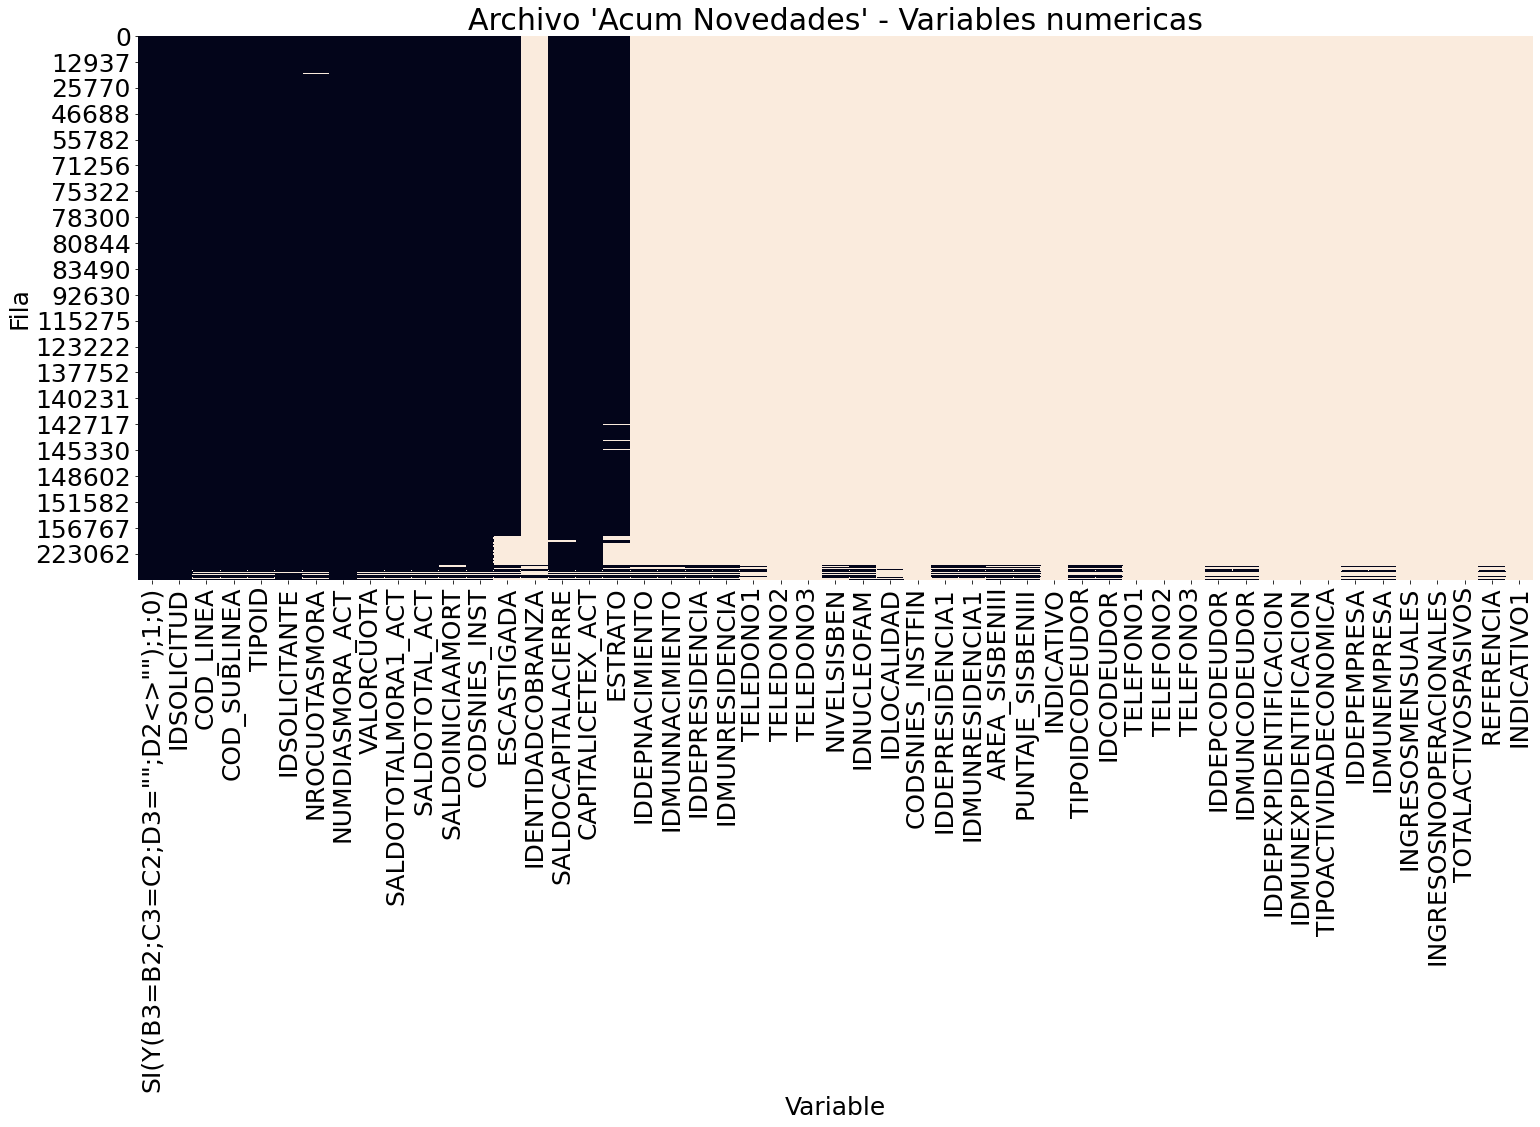

In [60]:
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(25,10))
sns.heatmap(df[features_f].isnull(), cbar=False)
plt.title("Archivo 'Acum Novedades' - Variables numericas")
plt.xlabel('Variable')
plt.ylabel('Fila')

<AxesSubplot:>

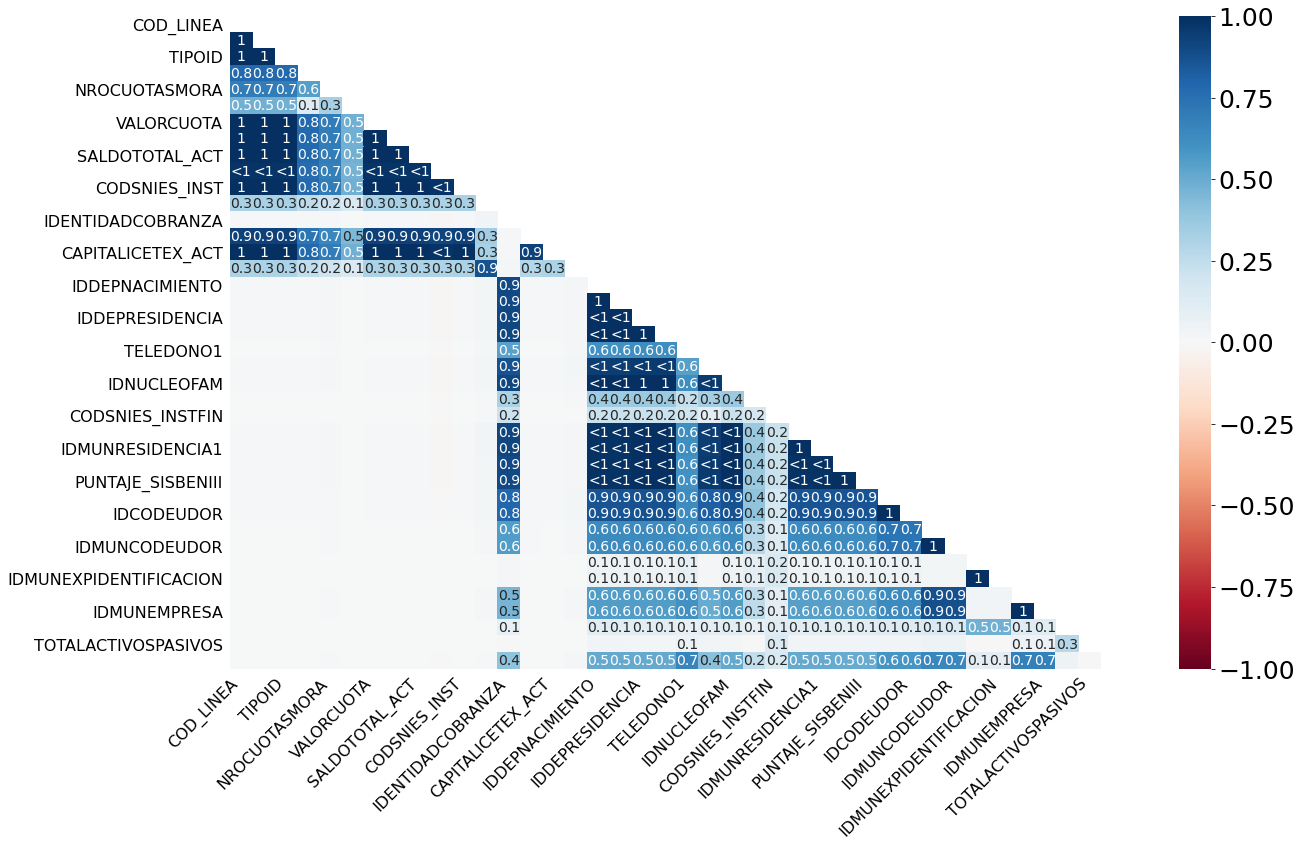

In [61]:
msno.heatmap(df[features_f])

Text(190.0, 0.5, 'Fila')

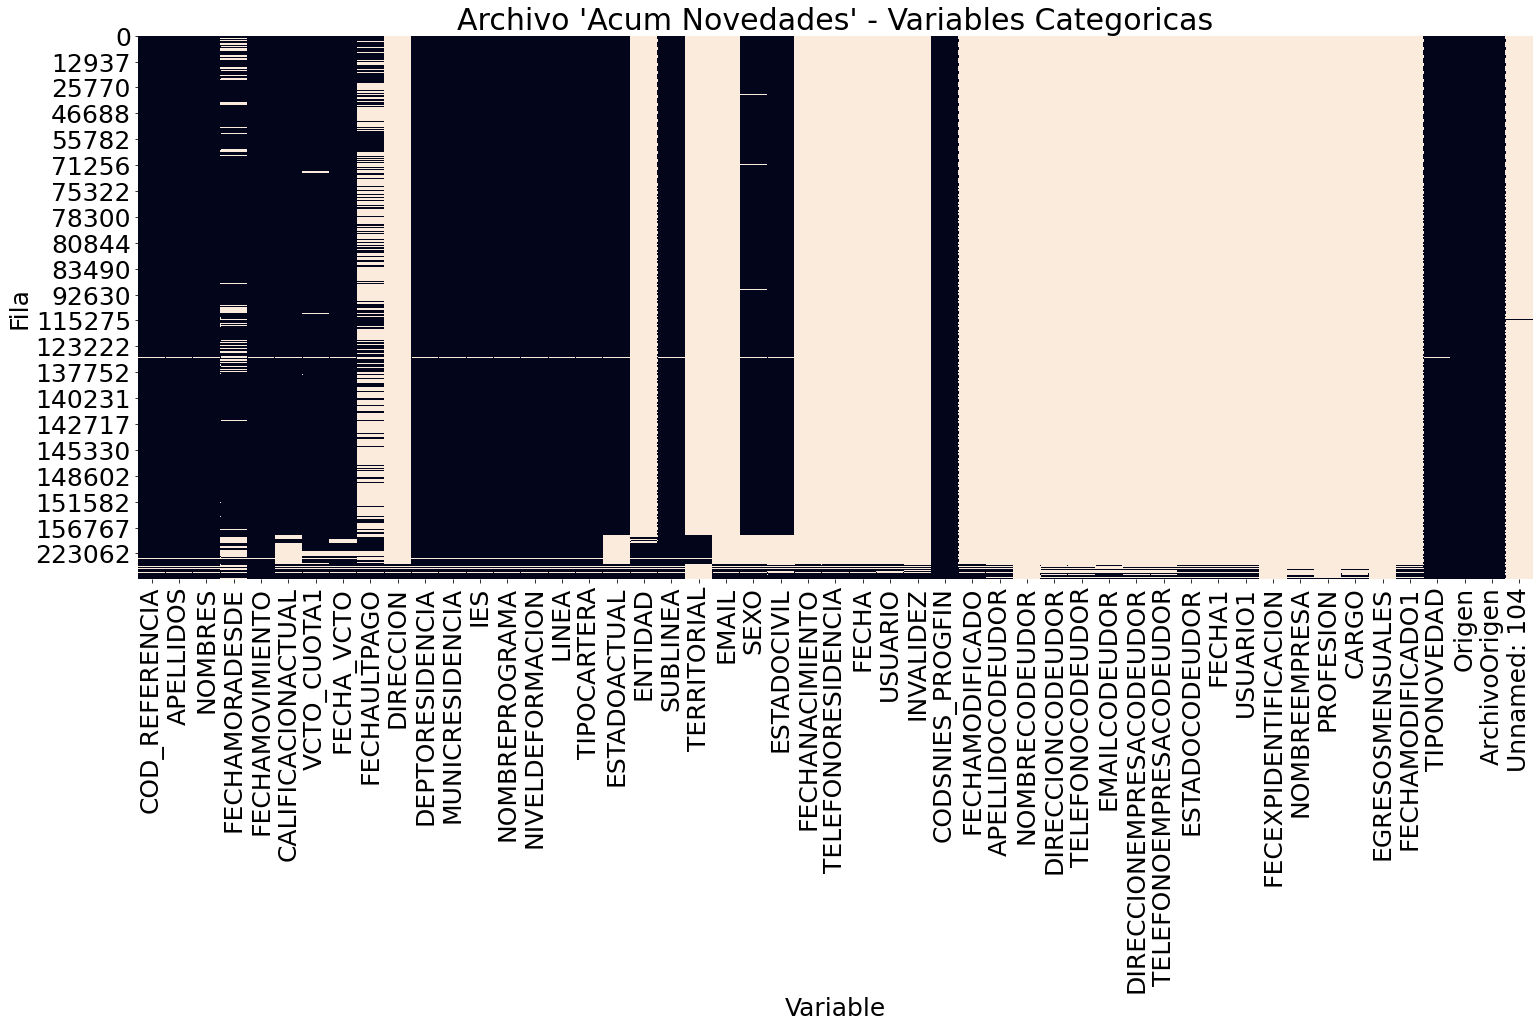

In [62]:
plt.figure(figsize=(25,10))
sns.heatmap(df[features_o].isnull(), cbar=False)
plt.title("Archivo 'Acum Novedades' - Variables Categoricas")
plt.xlabel('Variable')
plt.ylabel('Fila')

<AxesSubplot:>

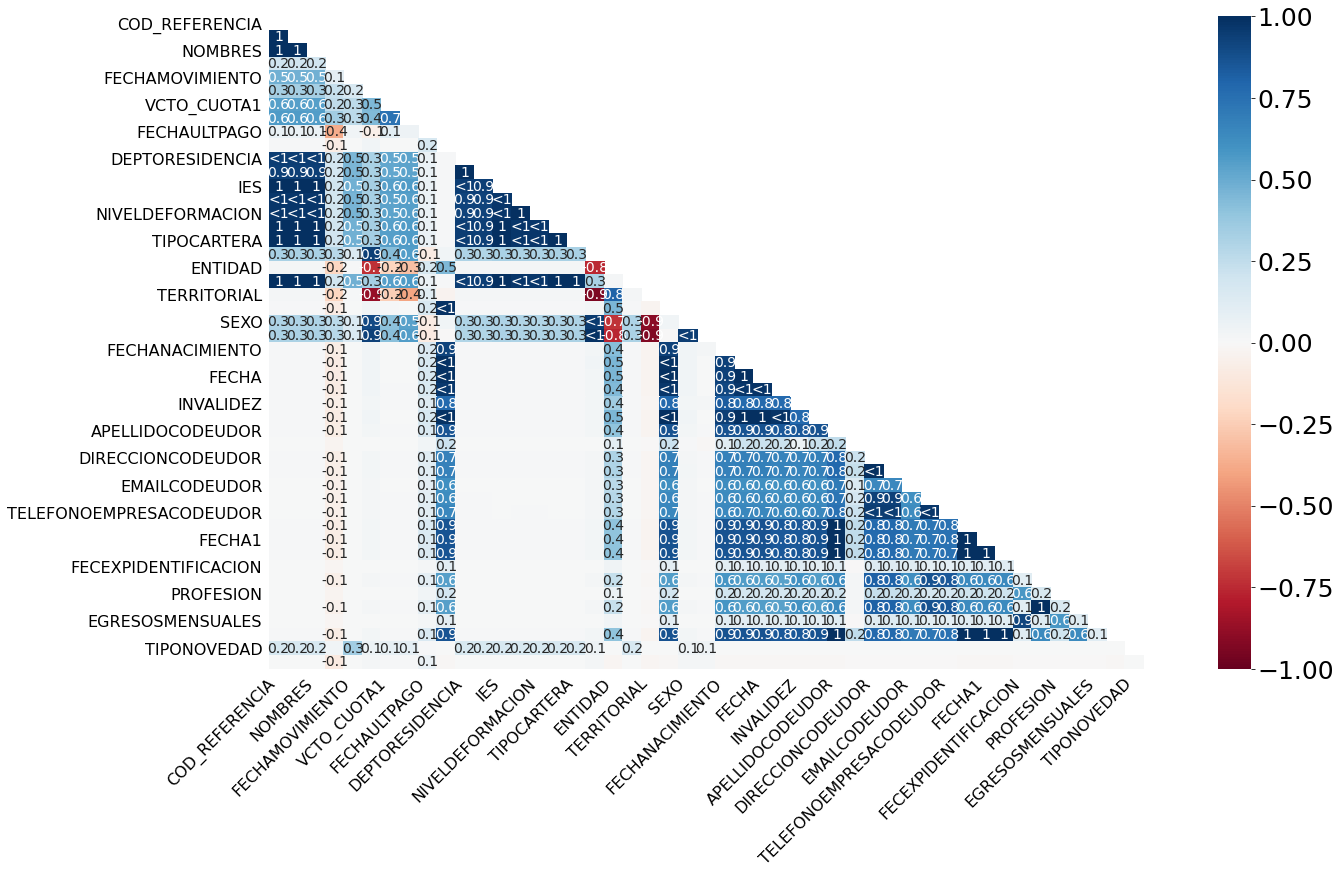

In [63]:
msno.heatmap(df[features_o])

Text(190.0, 0.5, 'Fila')

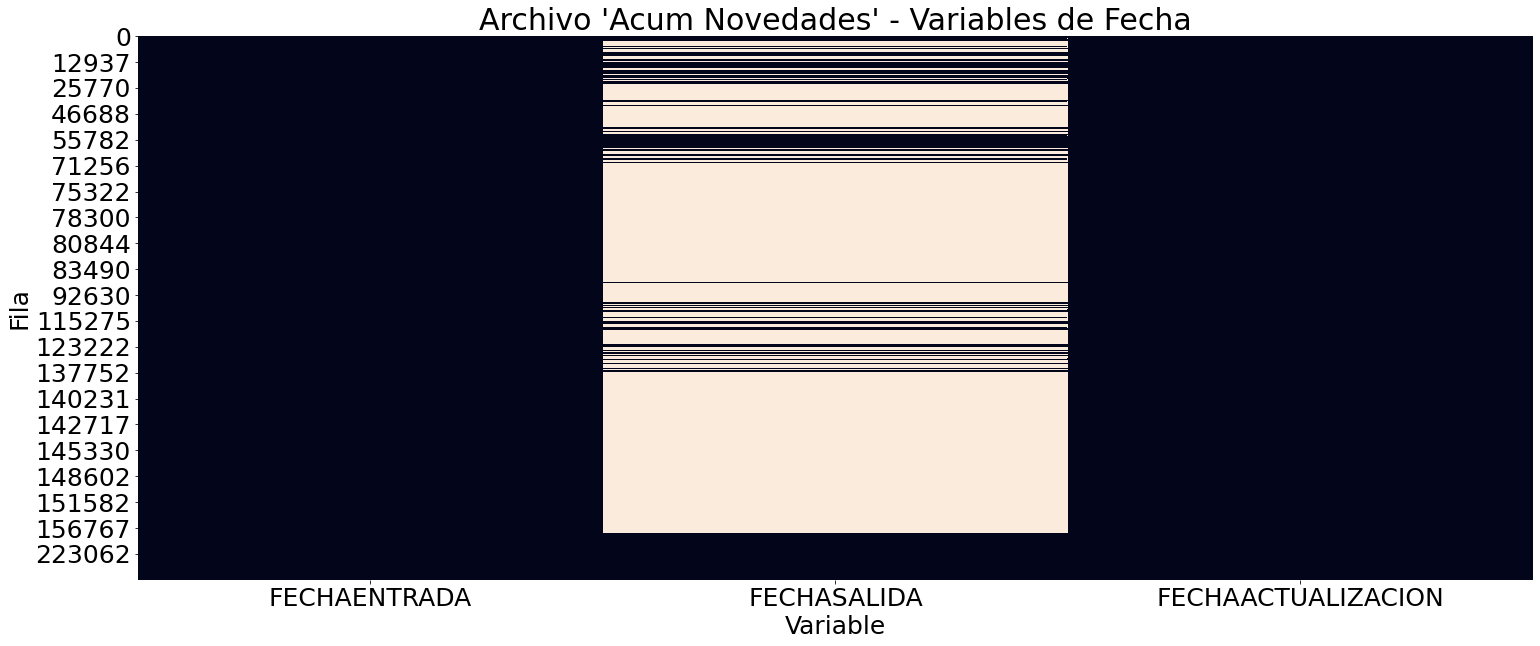

In [64]:
plt.figure(figsize=(25,10))
sns.heatmap(df[features_d].isnull(), cbar=False)
plt.title("Archivo 'Acum Novedades' - Variables de Fecha")
plt.xlabel('Variable')
plt.ylabel('Fila')

In [ ]:
msno.heatmap(df[features_d])

# 2. Archivo "Acuerdos de Pago"

In [67]:
df = pd.read_csv("data/(04)Acuerdos_de_Pago20201118.csv", sep = ';', encoding = 'latin-1')
df.shape

/home/asf/pip_envs/ICETEX/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,12,13,14,15,17,18,19,29,30,34,36,39,40,41,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(331352, 48)

In [70]:
df = df[df['Id Solicitud'].isin(punished['IDSOLICITUD'])]

In [71]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_d = features[features['type'] == '<M8[ns]'].index

Text(190.0, 0.5, 'Fila')

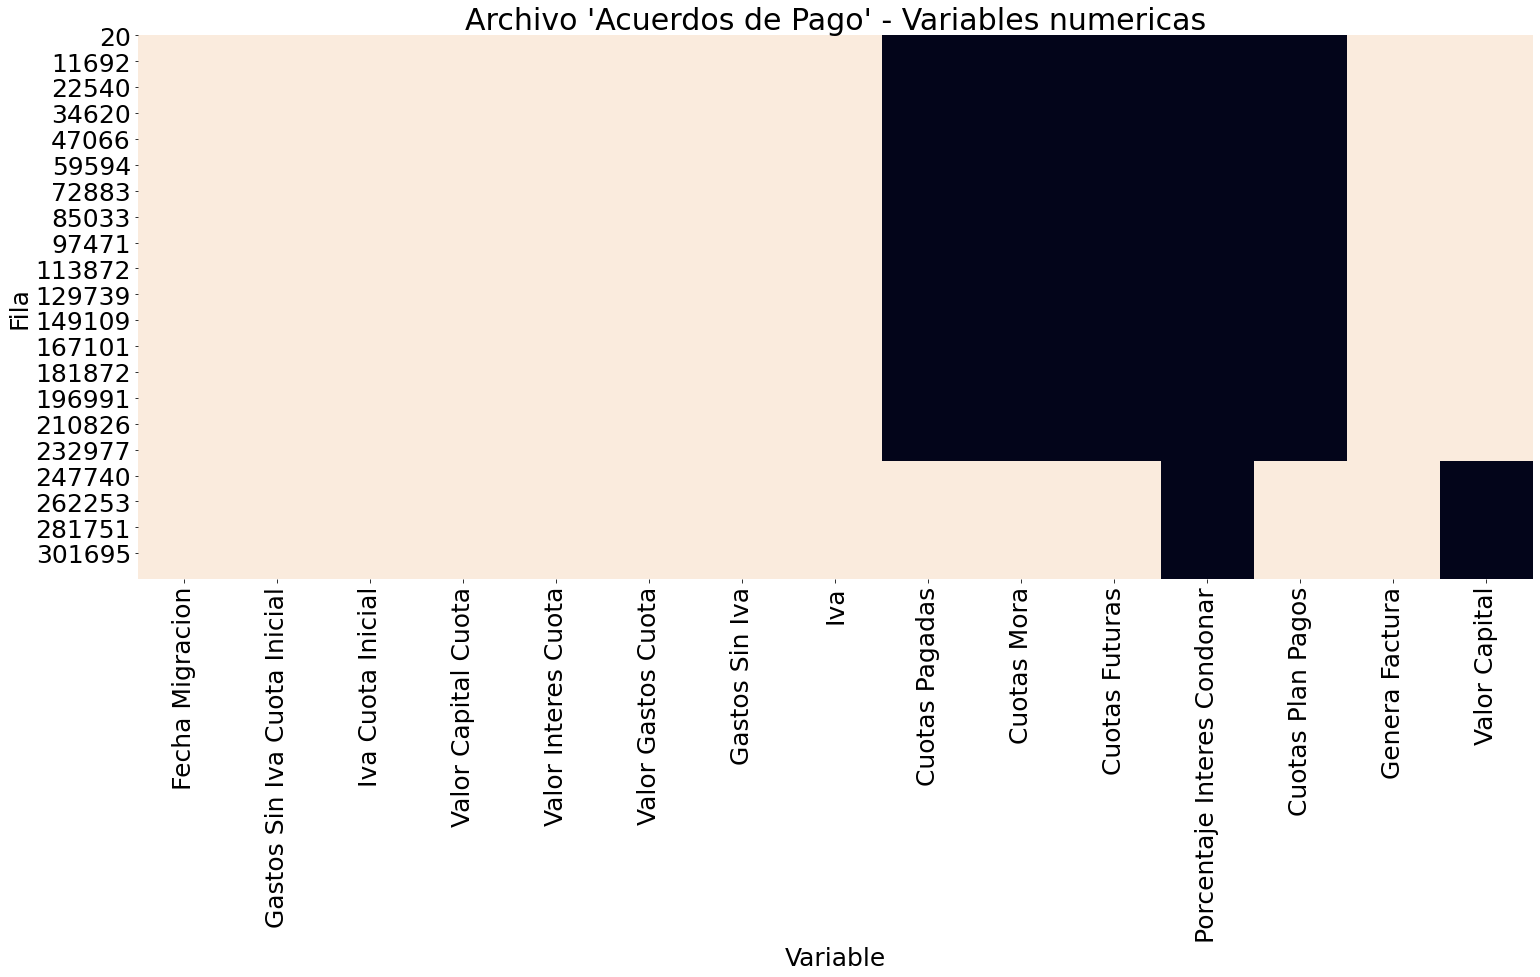

In [74]:
plt.figure(figsize=(25,10))
sns.heatmap(df[features_f].isnull(), cbar=False)
plt.title("Archivo 'Acuerdos de Pago' - Variables numericas")
plt.xlabel('Variable')
plt.ylabel('Fila')

<AxesSubplot:>

<Figure size 1800x720 with 0 Axes>

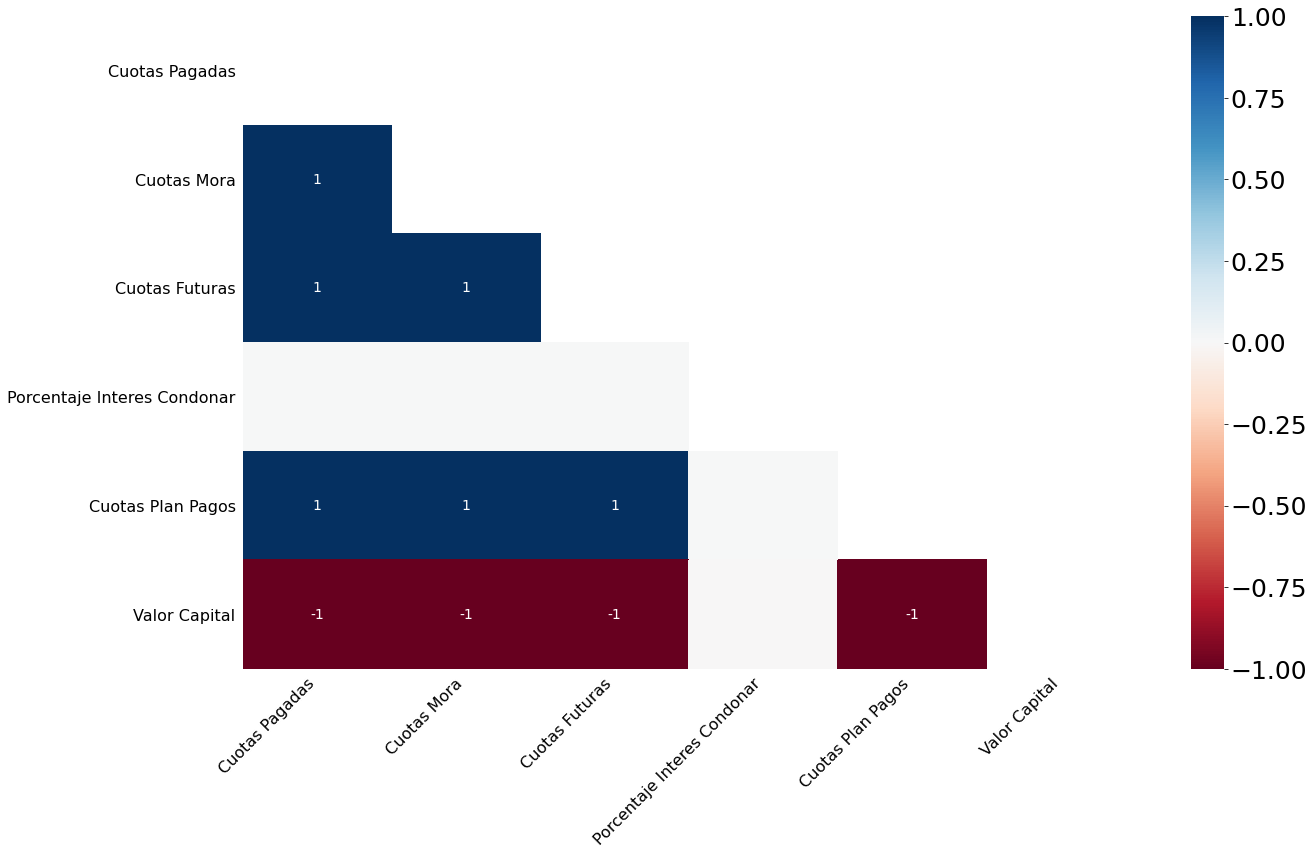

In [76]:
plt.figure(figsize=(25,10))
msno.heatmap(df[features_f])

Text(190.0, 0.5, 'Fila')

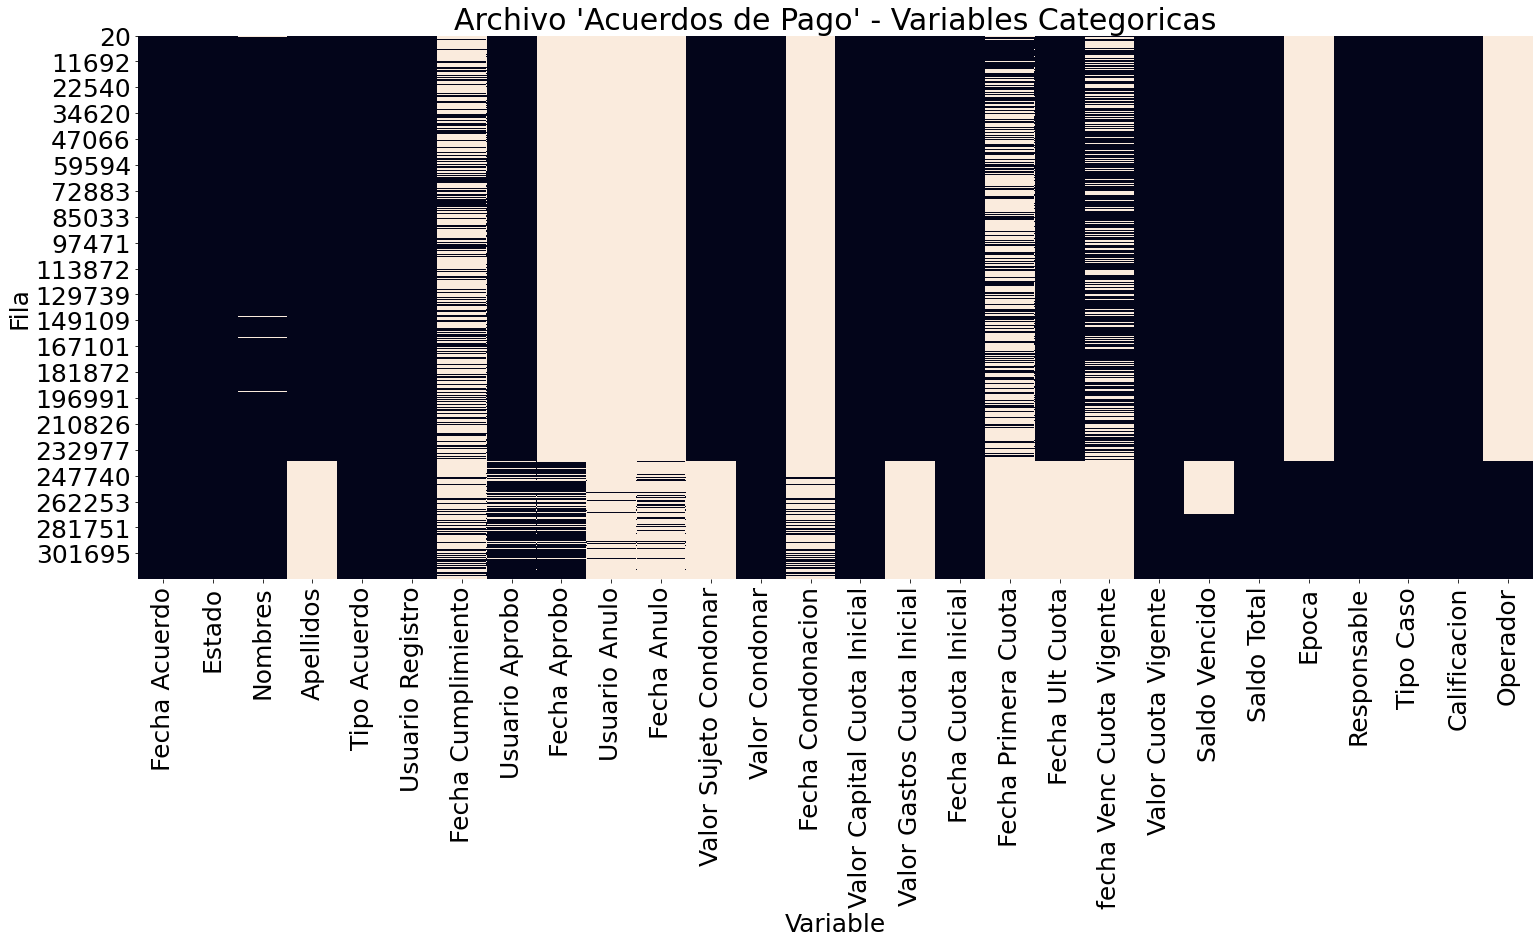

In [78]:
plt.figure(figsize=(25,10))
sns.heatmap(df[features_o].isnull(), cbar=False)
plt.title("Archivo 'Acuerdos de Pago' - Variables Categoricas")
plt.xlabel('Variable')
plt.ylabel('Fila')

<AxesSubplot:>

<Figure size 1800x720 with 0 Axes>

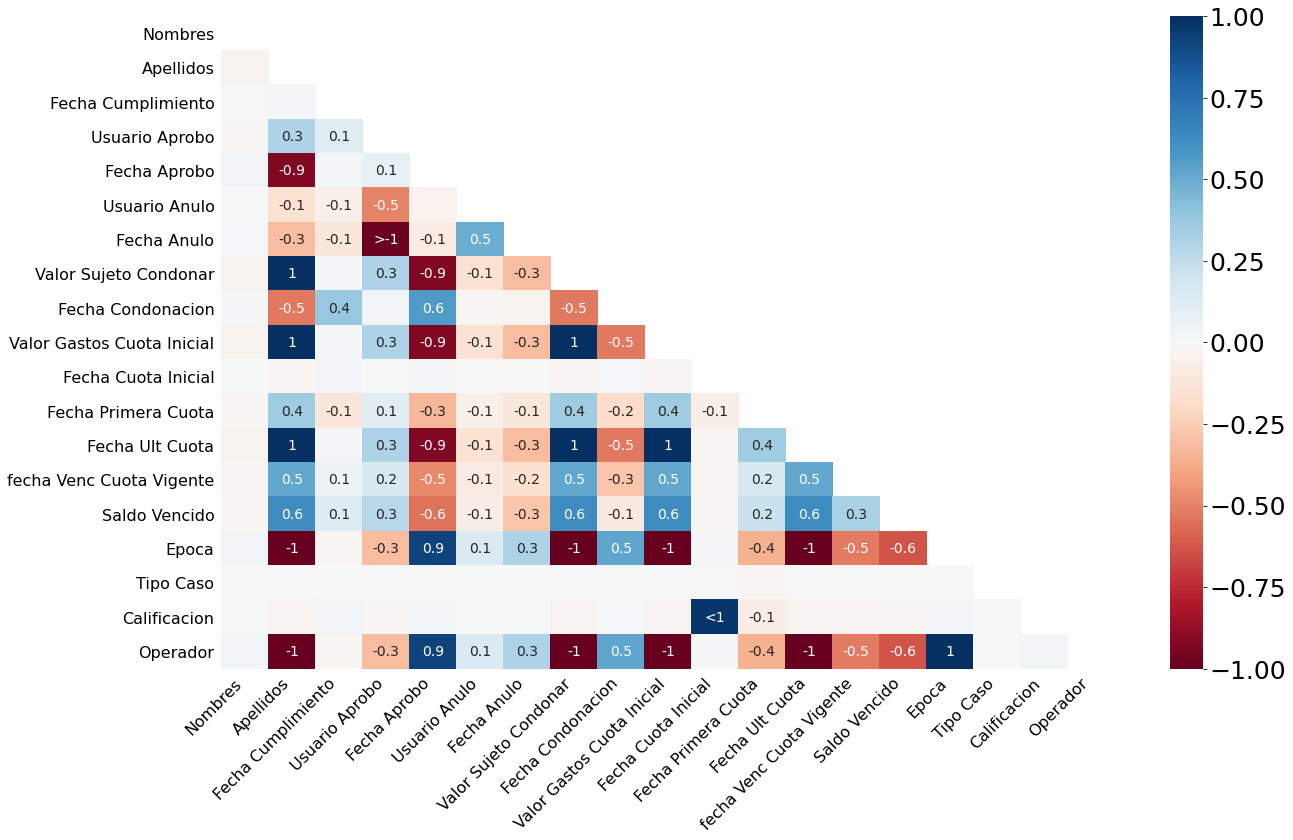

In [79]:
plt.figure(figsize=(25,10))
msno.heatmap(df[features_o])

# 3. Archivo "Actualización de saldos"

In [88]:
df = pd.read_excel("data/Actualizacion_Saldos_Asignacion_11_20201118.xlsx")
df.shape

(98599, 39)

In [91]:
df = df[df['IDSOLICITUD'].isin(punished['IDSOLICITUD'])]

In [92]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_d = features[features['type'] == '<M8[ns]'].index

Text(190.0, 0.5, 'Fila')

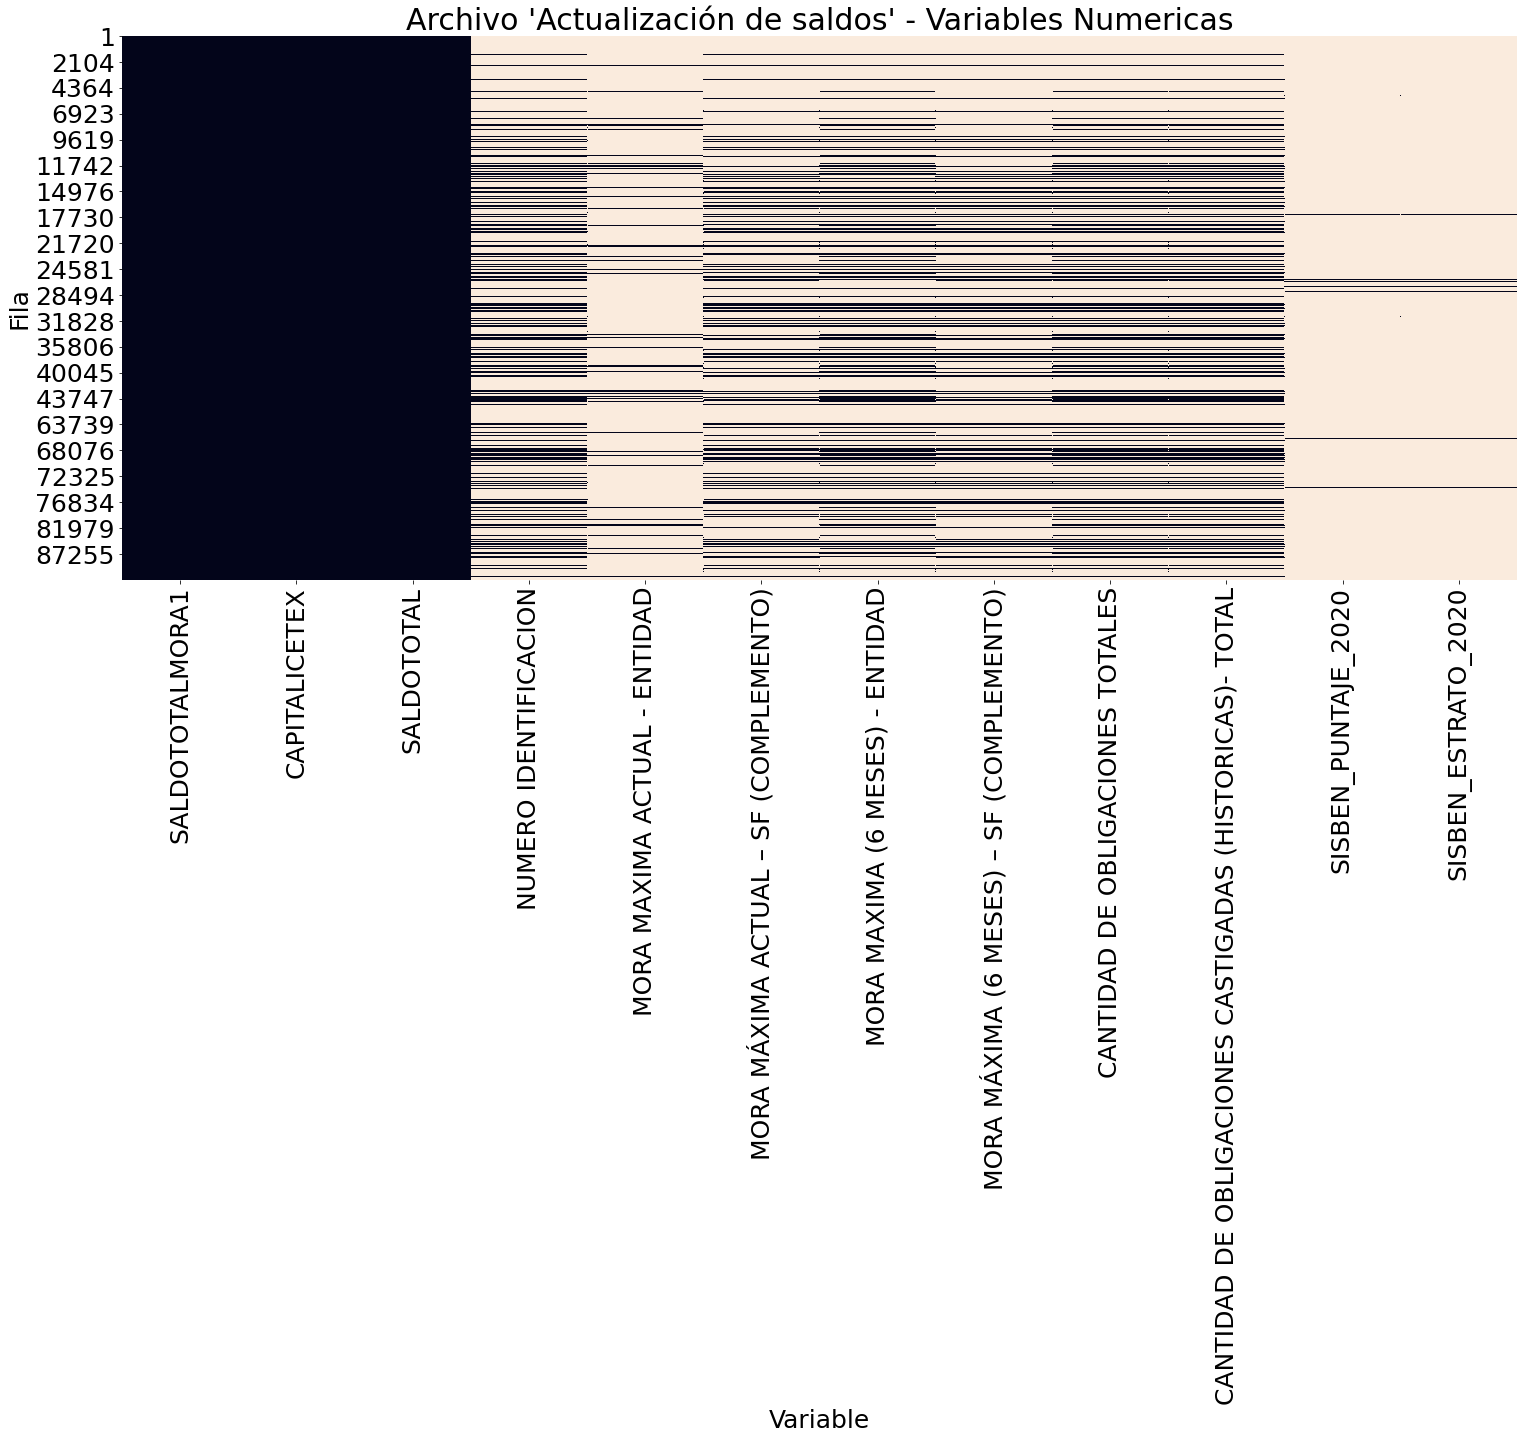

In [93]:
plt.figure(figsize=(25,10))
sns.heatmap(df[features_f].isnull(), cbar=False)
plt.title("Archivo 'Actualización de saldos' - Variables Numericas")
plt.xlabel('Variable')
plt.ylabel('Fila')

<AxesSubplot:>

<Figure size 1800x720 with 0 Axes>

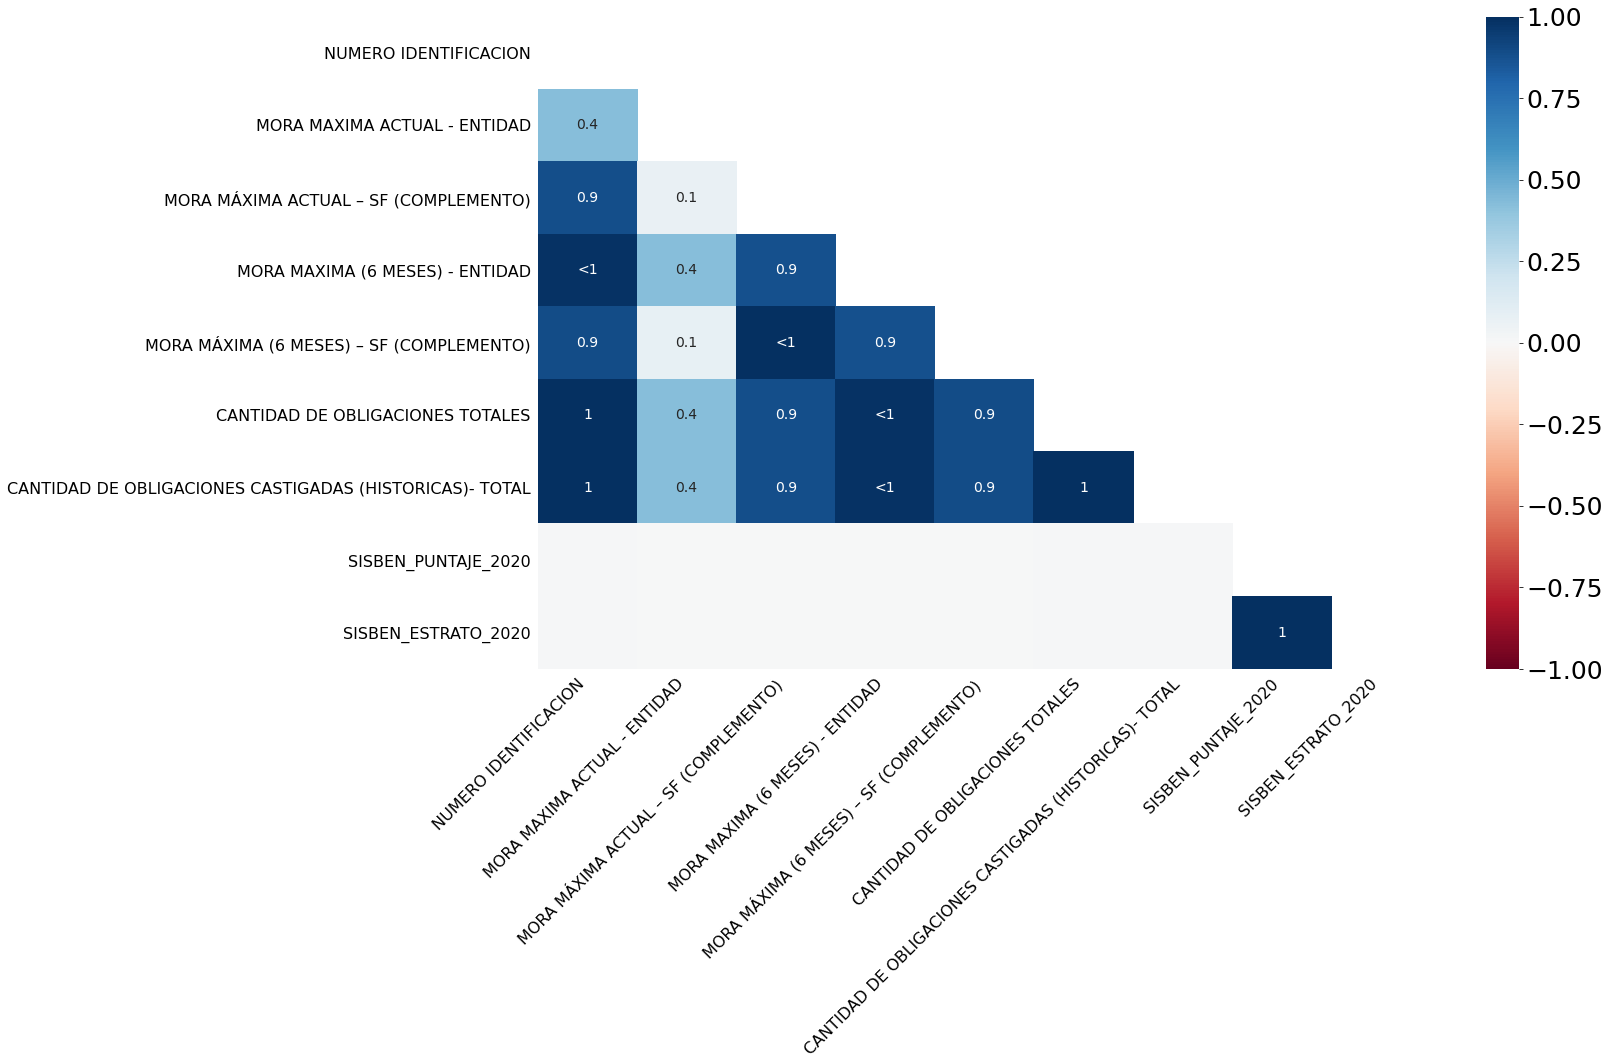

In [94]:
plt.figure(figsize=(25,10))
msno.heatmap(df[features_f])

Text(190.0, 0.5, 'Fila')

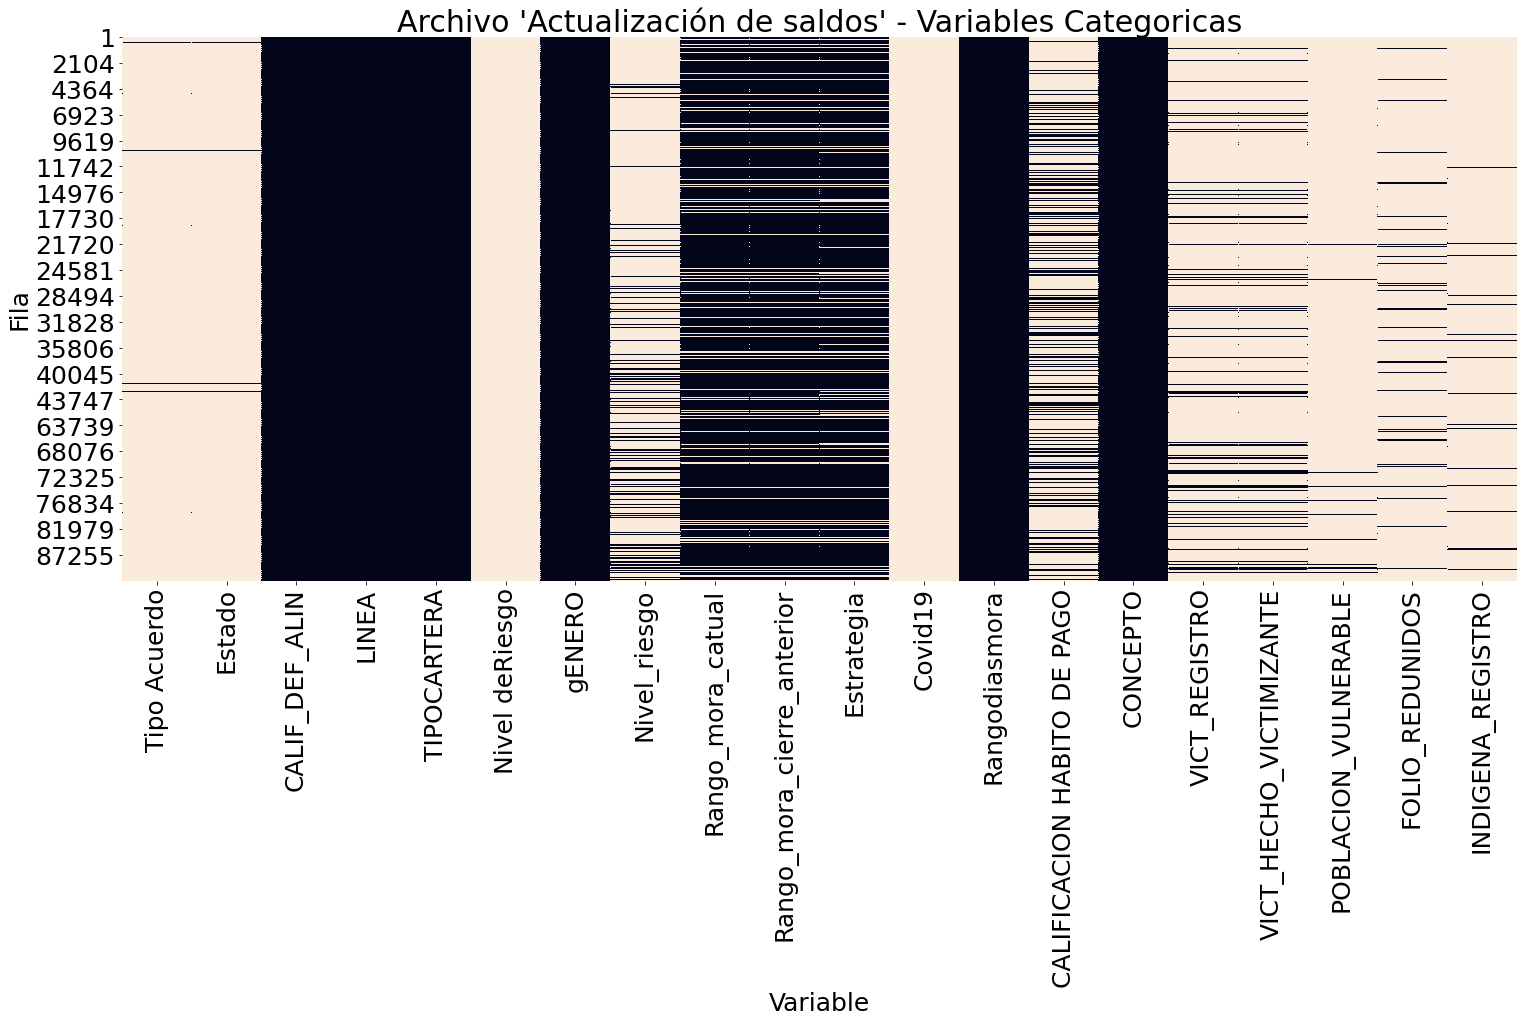

In [95]:
plt.figure(figsize=(25,10))
sns.heatmap(df[features_o].isnull(), cbar=False)
plt.title("Archivo 'Actualización de saldos' - Variables Categoricas")
plt.xlabel('Variable')
plt.ylabel('Fila')

Text(190.0, 0.5, 'Fila')

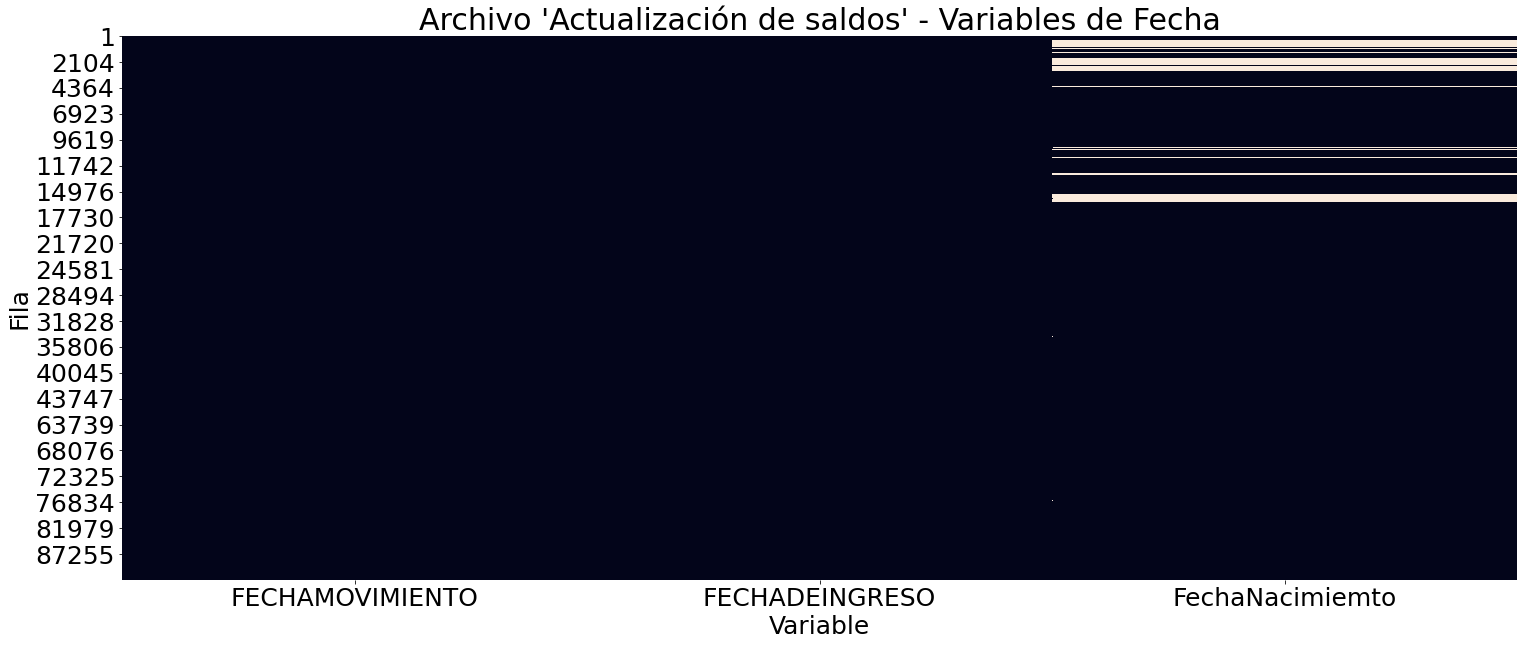

In [97]:
plt.figure(figsize=(25,10))
sns.heatmap(df[features_d].isnull(), cbar=False)
plt.title("Archivo 'Actualización de saldos' - Variables de Fecha")
plt.xlabel('Variable')
plt.ylabel('Fila')

# 4. Archivo "Gestion Vinculo"

In [98]:
df = pd.read_excel("data/Reporte_Gestion_Vinculo_TOTAL 2020 AMERICAS.xlsx")
df.shape

In [101]:
df = df[df['ID_SOLICITUD'].isin(punished['IDSOLICITUD'])]

Text(190.0, 0.5, 'Fila')

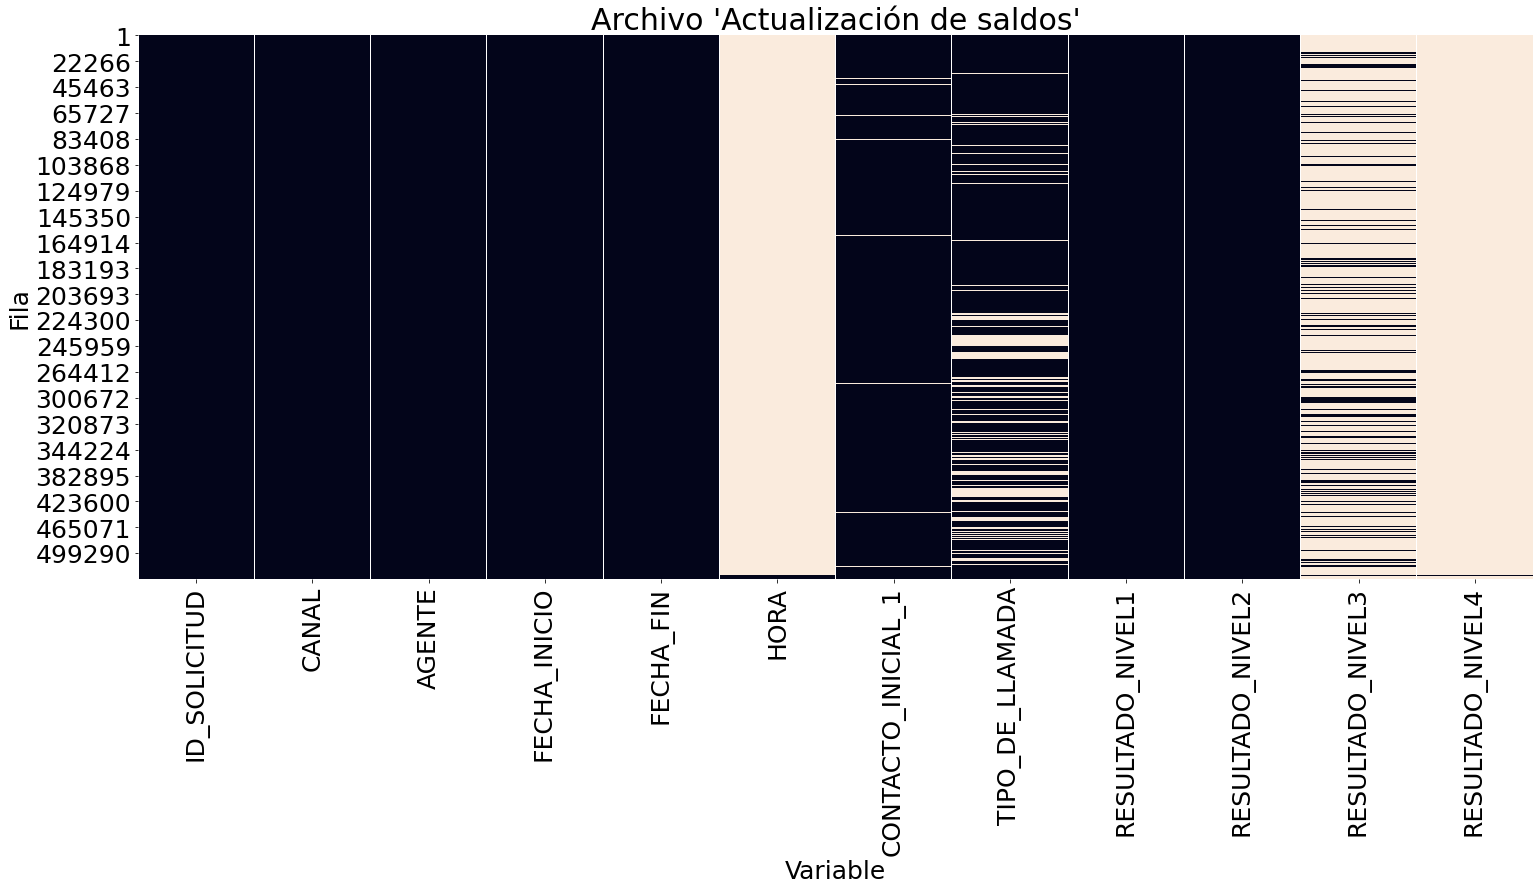

In [102]:
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Archivo 'Reporte Gestion Vinculo'")
plt.xlabel('Variable')
plt.ylabel('Fila')

<AxesSubplot:>

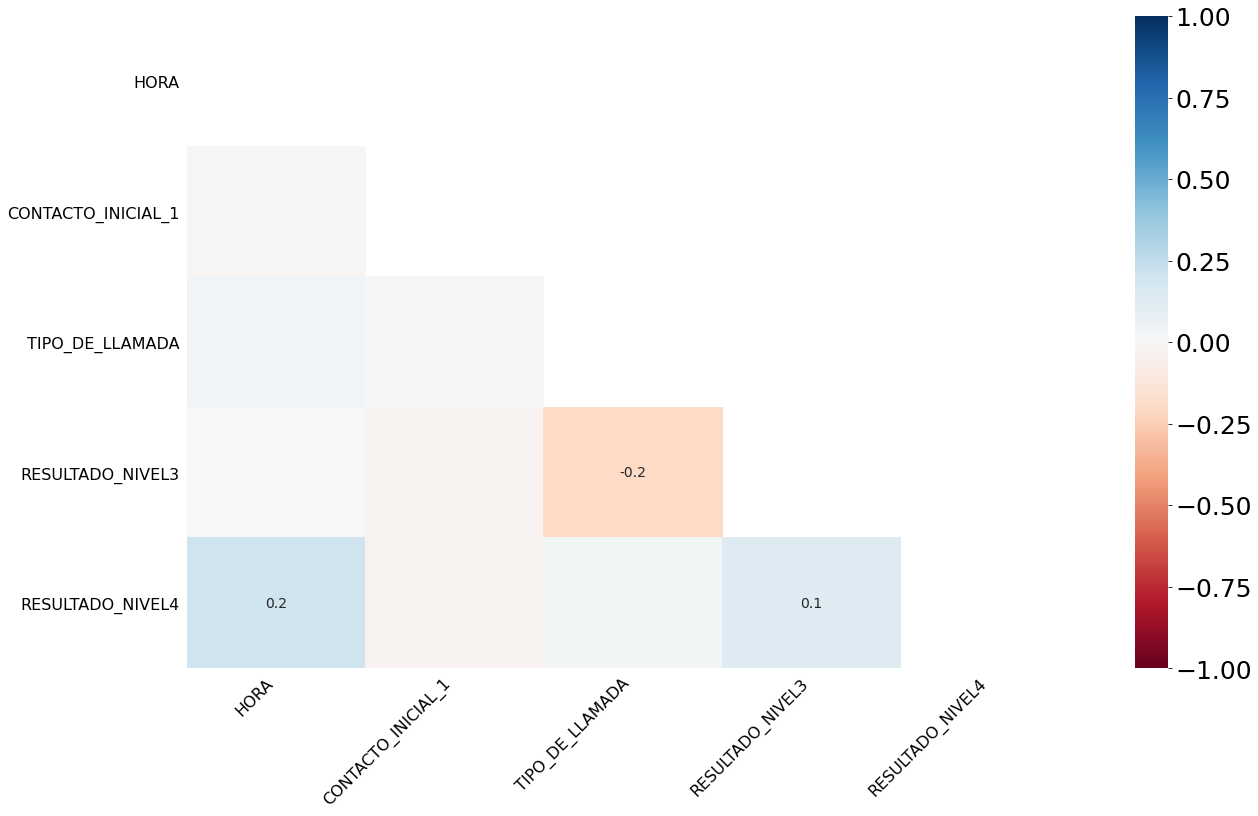

In [105]:
msno.heatmap(df)

# 5. Archivo "Fosyga"

In [106]:
df = pd.read_excel("data/Actualizacion_Fosyga_11_20201118.xlsx")
df.shape

(93806, 11)

In [109]:
df = df[df['IDSOLICITUD'].isin(punished['IDSOLICITUD'])]

Text(190.0, 0.5, 'Fila')

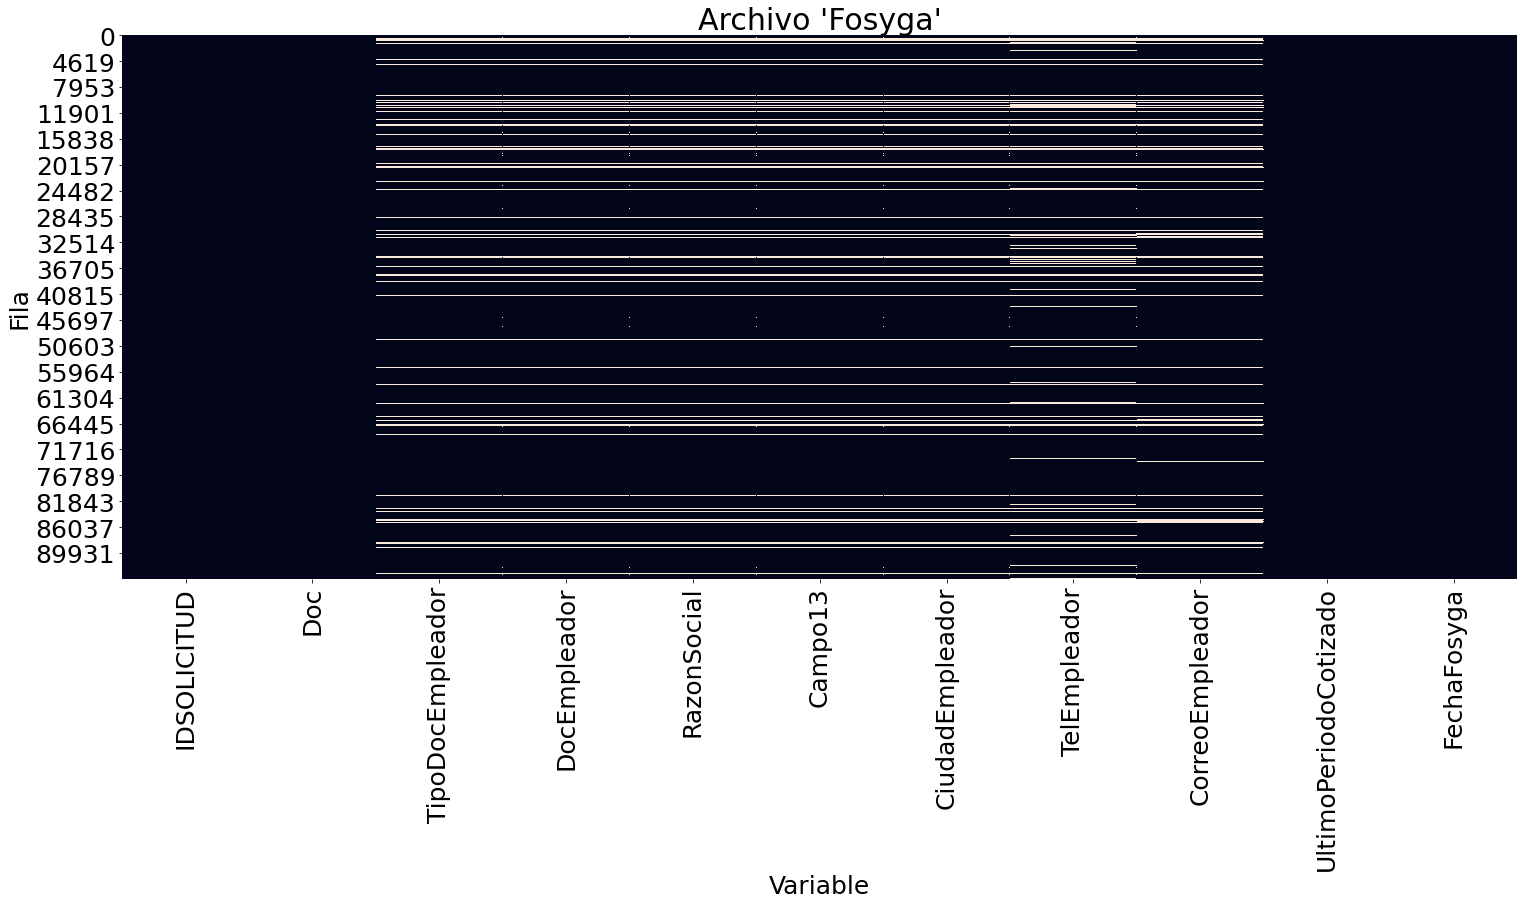

In [111]:
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Archivo 'Fosyga'")
plt.xlabel('Variable')
plt.ylabel('Fila')

<AxesSubplot:>

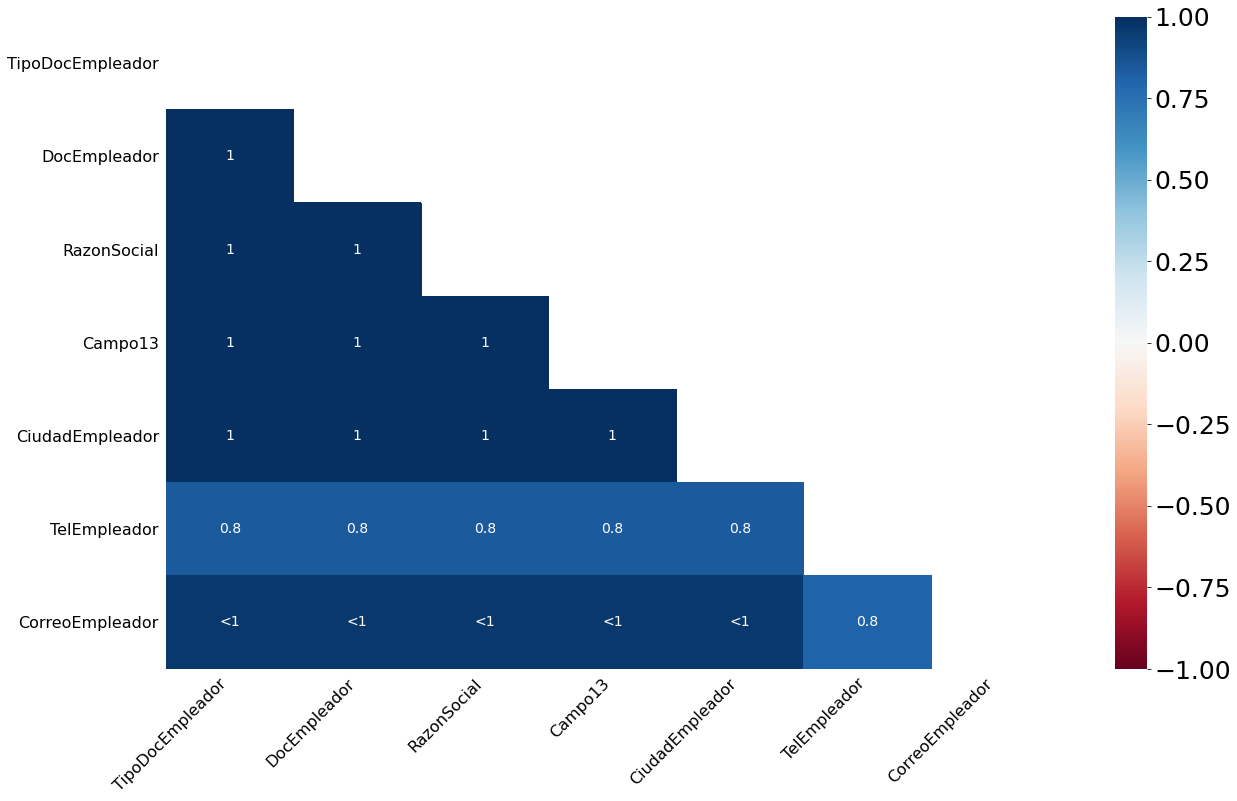

In [112]:
msno.heatmap(df)

# 6. Archivo "Recaudo"

In [5]:
df = pd.read_excel("data/Recaudo_11_20201118.xlsx")
df.shape

(108051, 3)

In [6]:
df = df[df['IDSOLICITUD'].isin(punished['IDSOLICITUD'])]
df.shape

(2082, 3)

Text(27.999999999999996, 0.5, 'Fila')

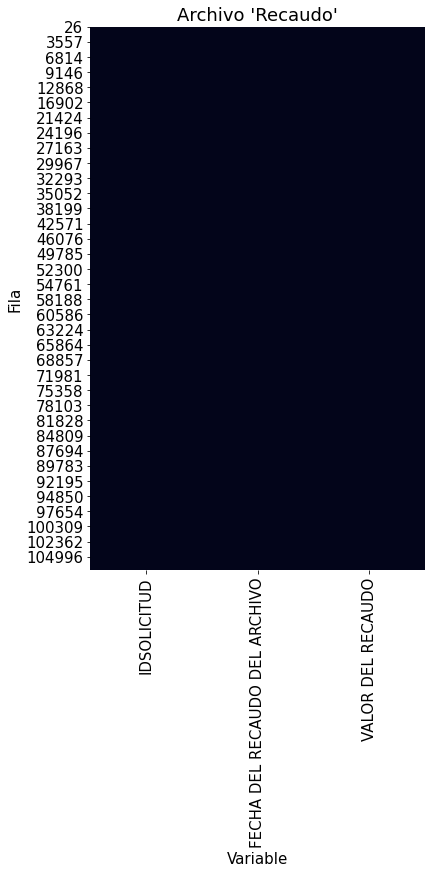

In [19]:
plt.figure(figsize=(6,10))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Archivo 'Recaudo'")
plt.xlabel('Variable')
plt.ylabel('Fila')

<AxesSubplot:>

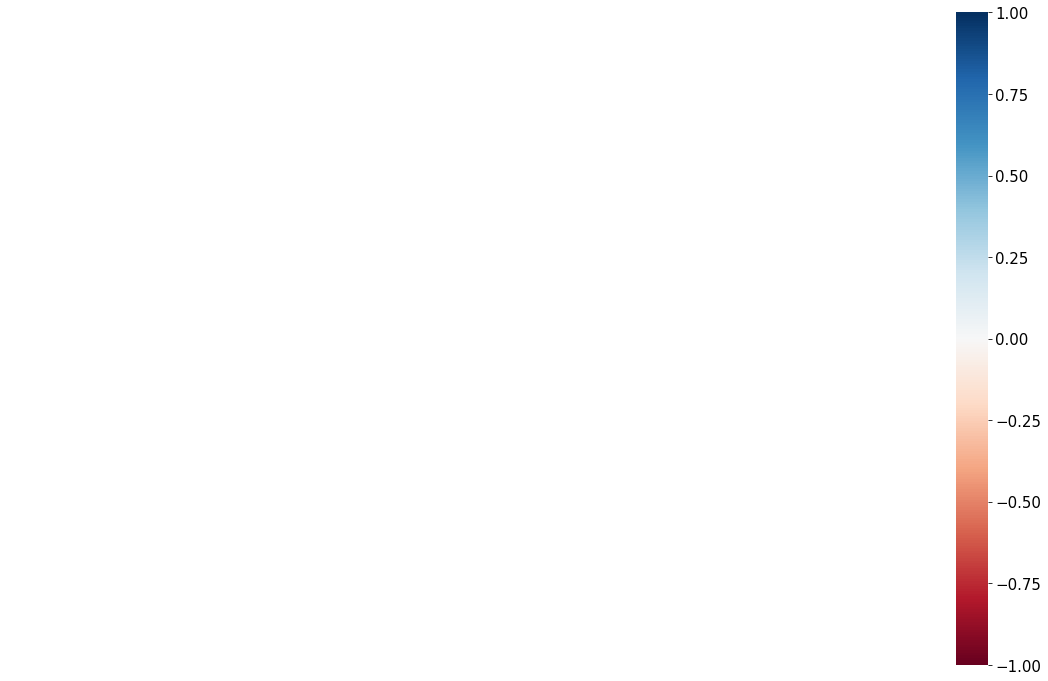

In [20]:
msno.heatmap(df)